📢 폰트 설정 완료: NanumGothic -> AppleGothic -> Malgun Gothic 순으로 확인합니다!


/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 데이터 로드 성공: 교보문고_카테고리_상품리스트.xlsx
✅ 데이터 전처리 완료
✅ 키워드 추출 완료
✅ 빈도수 분석 완료
   키워드  빈도수
0   활용   92
1  파이썬   72
2   이기   65
3  컴퓨터   56
4   능력   52
5  데이터   51
6   분석   45
7   기본   45
8   러닝   38
9   엑셀   37


/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) miss

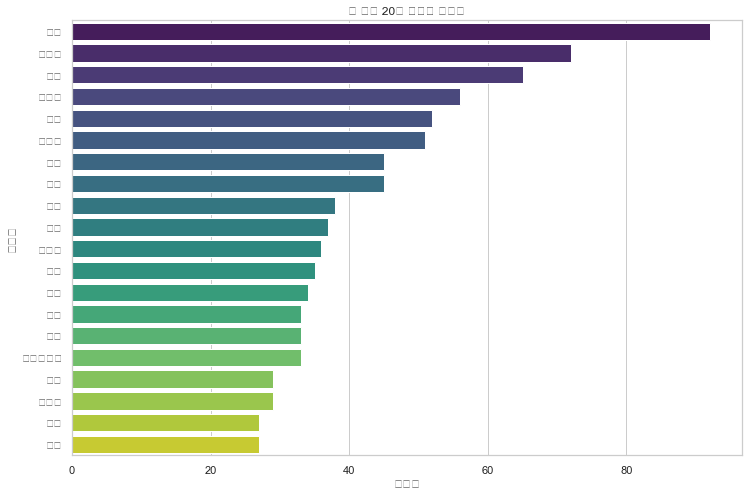

/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyuk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


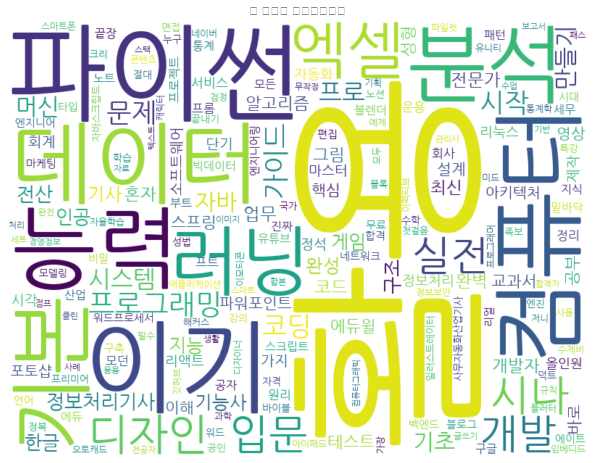

In [3]:
import os
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fm

# -----------------------------
# 1. 폰트 설정
# -----------------------------
# (1) NanumGothic 폰트 (우선 사용)
# (2) 만약 특정 글리프 누락 시 AppleGothic, Malgun Gothic 등 fallback

# 강제로 NanumGothic 폰트 등록
nanum_font_path = '/Users/kimdonghyuk/Library/Fonts/NanumGothic-Regular.ttf'
fm.fontManager.addfont(nanum_font_path)

# 여러 폰트를 순서대로 지정하여 누락된 글리프 문제 완화
plt.rcParams['font.family'] = [
    'NanumGothic',   # 우선 시도
    'AppleGothic',   # macOS 기본 한글 폰트 (fallback)
    'Malgun Gothic', # Windows 기본 한글 폰트 (fallback)
    'sans-serif'     # 기본 sans-serif 폰트
]
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

print("📢 폰트 설정 완료: NanumGothic -> AppleGothic -> Malgun Gothic 순으로 확인합니다!")

# -----------------------------
# 2. 엑셀 데이터 불러오기
# -----------------------------
file_path = '교보문고_카테고리_상품리스트.xlsx'  # 엑셀 파일 경로
df = pd.read_excel(file_path)
print(f"✅ 데이터 로드 성공: {file_path}")

# -----------------------------
# 3. 데이터 전처리
# -----------------------------
required_columns = ['상품명', '정가', '판매가', '할인율', '적립율', '적립예정포인트', '출판사']

# 필요한 컬럼이 모두 있는지 체크
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"다음 컬럼들이 누락되었습니다: {missing_cols}")

df = df[required_columns]

numeric_columns = ['정가', '판매가', '할인율', '적립율', '적립예정포인트']
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('%', '').astype(float)

print("✅ 데이터 전처리 완료")

# -----------------------------
# 4. 키워드 추출 (KoNLPy)
# -----------------------------
okt = Okt()
stopwords = ['기술', '이론', '기본서', '문제집', '실무', '기출', '필기', '실기']  # 분석 제외할 단어들

all_nouns = []
for title in df['상품명']:
    nouns = okt.nouns(title)  # 명사만 추출
    filtered = [n for n in nouns if n not in stopwords and len(n) > 1]
    all_nouns.extend(filtered)

print("✅ 키워드 추출 완료")

# -----------------------------
# 5. 빈도수 분석
# -----------------------------
word_counts = Counter(all_nouns)
top_keywords = word_counts.most_common(20)
keywords_df = pd.DataFrame(top_keywords, columns=['키워드', '빈도수'])

print("✅ 빈도수 분석 완료")
print(keywords_df.head(10))

# -----------------------------
# 6. 데이터 시각화
# -----------------------------
sns.set(style="whitegrid")

# (1) 막대 그래프 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='빈도수', y='키워드', data=keywords_df, palette='viridis')
plt.title('🔎 상위 20개 키워드 빈도수')
plt.xlabel('빈도수')
plt.ylabel('키워드')
plt.show()

# (2) 워드클라우드 생성
try:
    wordcloud = WordCloud(
        font_path=nanum_font_path,  # NanumGothic 폰트 지정
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(dict(word_counts))

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('🌟 키워드 워드클라우드')
    plt.show()
except ValueError as e:
    print(f"⚠️ 워드클라우드 생성 중 문제 발생: {e}")